## Lab: Cluster Anlaysis with Wine Data¶
Load in the Wine dataset in the cooresponding assets directory and attempt the following:
Perform K-Means with evaluation metrics for silhouette.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix

## 1. Load the dataset

In [5]:
df = pd.read_csv('../2.1-tuning-clusters/assets/datasets/wine.csv')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Check for bad/missing data

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3. Explore features with scatterplots/pairplots

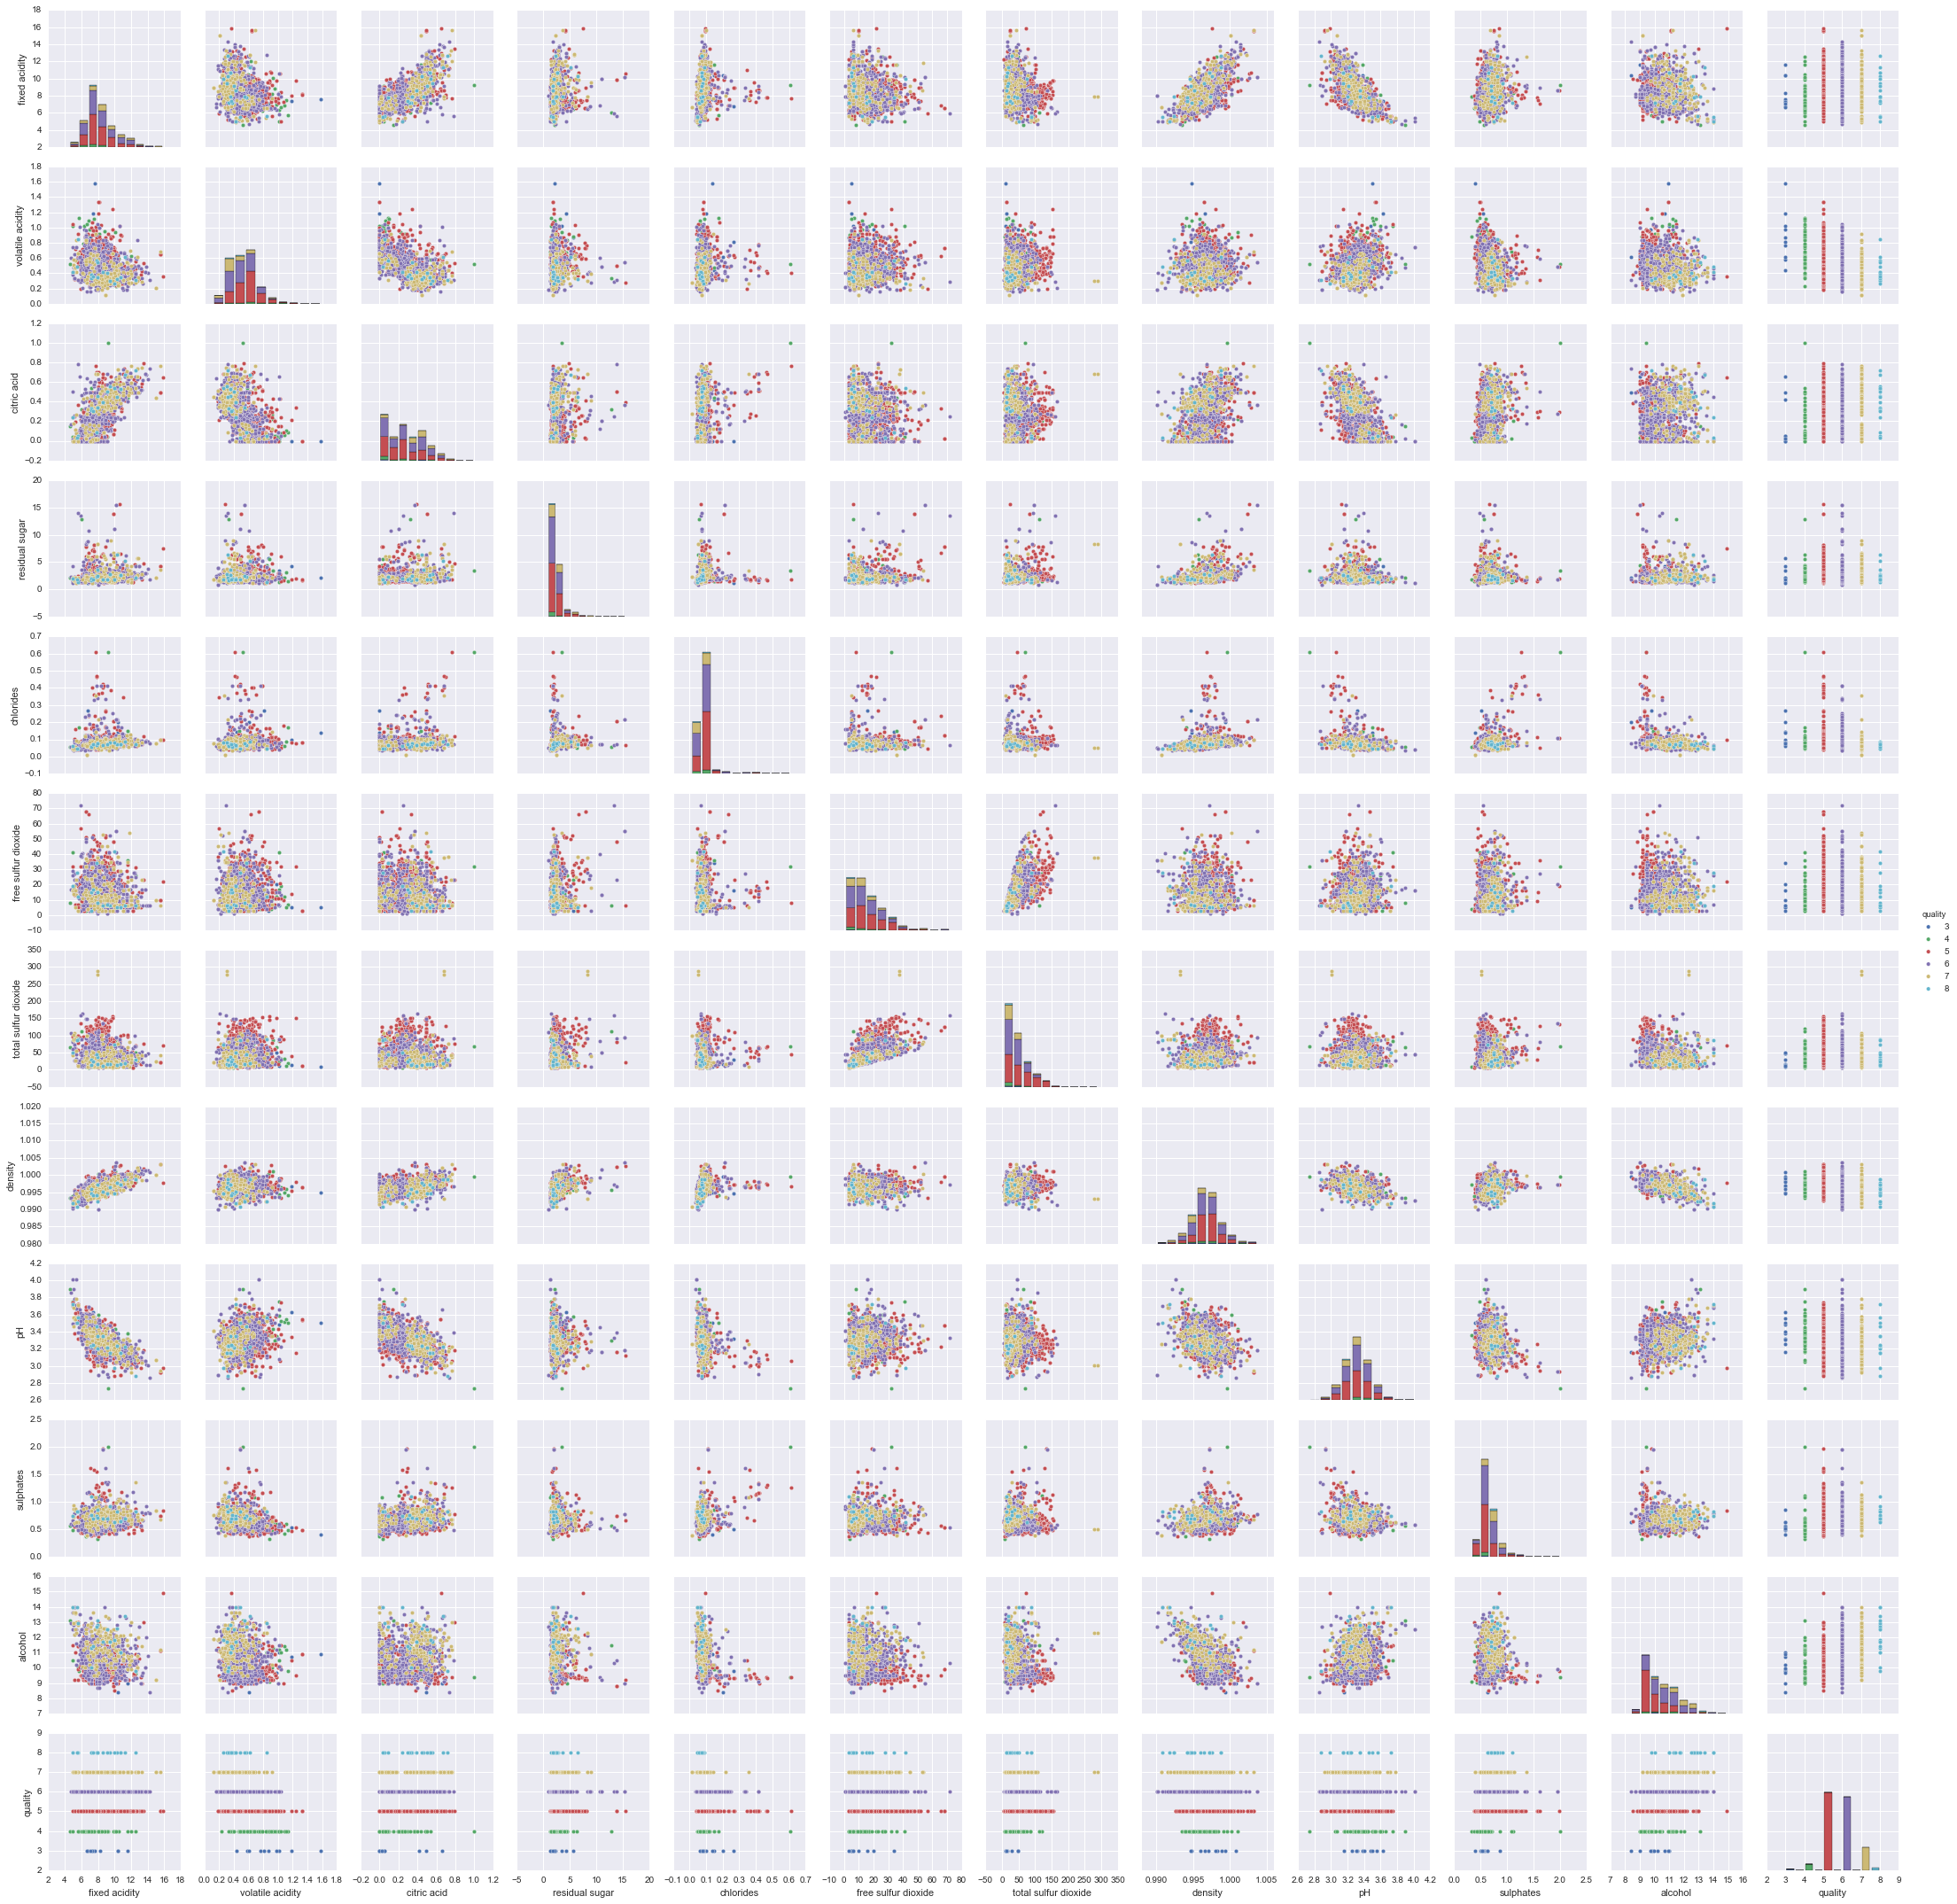

In [17]:
sns.pairplot(df, hue='quality')

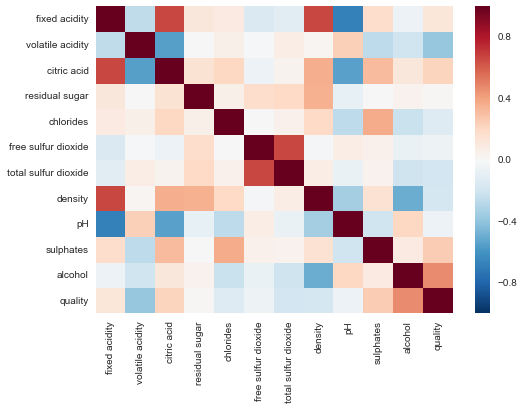

In [16]:
sns.heatmap(df.corr())

## 4. Any interesting relationships/clusters to be noted?

Besides the directly correlated pH with acidity:

- density with fixed acidity
- Volatile acidity with citric acid
- density with alcohol

## 5. Plot KMeans scatters with centroids

In [18]:
df['quality'].nunique()

6

In [38]:
want_list = [x for x in df.columns if x != 'quality']

y = df['quality']
X = df[want_list]

In [21]:
# Number of clusters
k = 6
kmean = KMeans(n_clusters=k)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
label = kmean.labels_

In [44]:
centroids = kmean.cluster_centers_

In [49]:
centroids = pd.DataFrame(centroids, columns=X.columns)
centroids


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.193949,0.517627,0.272261,2.394108,0.094242,24.668790,60.038217,0.996837,3.326178,0.687006,10.303132
1,7.846032,0.576349,0.259418,3.116931,0.088386,23.201058,92.449735,0.996868,3.314074,0.637090,10.130423
2,8.692473,0.510591,0.295645,2.436022,0.084703,7.121864,17.842294,0.996664,3.294032,0.653333,10.653524
3,8.032911,0.569114,0.307595,3.220253,0.090443,31.208861,131.658228,0.997215,3.239620,0.698987,9.731646
4,7.900000,0.300000,0.680000,8.300000,0.050000,37.500000,283.500000,0.993160,3.010000,0.510000,12.300000
5,8.198031,0.529650,0.236630,2.381619,0.085455,14.745077,37.315098,0.996670,3.334070,0.646499,10.456127


In [40]:
y = y.apply(lambda x: x-3)

In [39]:
y.unique()

array([5, 6, 7, 4, 8, 3])

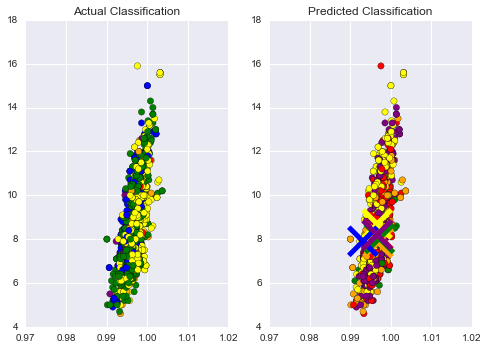

In [59]:
colormap = np.array(['red', 'orange', 'yellow', 'green', 'blue', 'purple'])

plt.subplot(1,2,1)
plt.scatter(X['density'], X['fixed acidity'], c= colormap[y], s = 40)
plt.title('Actual Classification')

plt.subplot(1,2,2)
plt.scatter(X['density'], X['fixed acidity'], c= colormap[label], s = 40)
plt.scatter(centroids['density'], centroids['fixed acidity'], s = 800, linewidths=5, c = colormap,marker='x')
plt.title('Predicted Classification')

## 6. Choose scatters that look by eye without using any metrics

## 7. Perform evalutation metrics

## 8. What is the optimal k?